

# Imports

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Lambda, Input, Flatten, Layer, concatenate, Conv2D
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation, MaxPool2D
from tensorflow.keras.models import Model
import os
import PIL
import imageio
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils.vis_utils import plot_model


# Callbacks



In [2]:
try:
    os.mkdir("./images")
except:
    pass

#### Utility function for plotting

In [3]:
plt.rc('figure' , figsize = (15,3))
plt.rc('font'   , size = 20)

def display_image(input , prediction , y_true):
    plt.clf()

    plt.yticks([])
    plt.grid(None)
    input = np.reshape(input , [10,28,28])
    input = np.swapaxes(input , 0 , 1)
    input = np.reshape(input , [28 , 28*10])
    plt.imshow(input)
    plt.xticks([28 * x + 14 for x in range(10)] , prediction)
    for i in range(len(plt.gca().xaxis.get_ticklabels())):
        if y_true[i] == prediction[i]:
            plt.gca().xaxis.get_ticklabels()[i].set_color('green')
        else:
            plt.gca().xaxis.get_ticklabels()[i].set_color('red')
    plt.grid(None)

In [4]:
class MyCallBack(tf.keras.callbacks.Callback):
    def __init__(self , inputs , y_true , number_images = 10 , freq = 2):
        self.inputs         = inputs
        self.y_true    = y_true
        self.number_images  = number_images
        self.freq           = freq
        self.images         = []

    def on_epoch_end(self , epoch , logs ={}):
        choice = np.random.choice(len(self.inputs) , self.number_images)
        input  = self.inputs[choice]
        output = np.argmax(self.y_true[choice]  , axis = 1)
        pred   = np.argmax(self.model.predict(input) , axis = 1)

        display_image(input , pred , output)

        name = "./images/fig%d.png"%epoch
        plt.savefig(name)
        image = Image.open(name)
        self.images.append(np.array(image))

        if epoch % self.freq == 0:
            plt.show()
    def on_train_end(self , logs = {}):
        imageio.mimsave('/content/animation.gif' , self.images , fps = 1)
        print(len(self.images))

# Data

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test  = tf.keras.utils.to_categorical(y_test)

In [6]:
y_train.shape

(60000, 10)

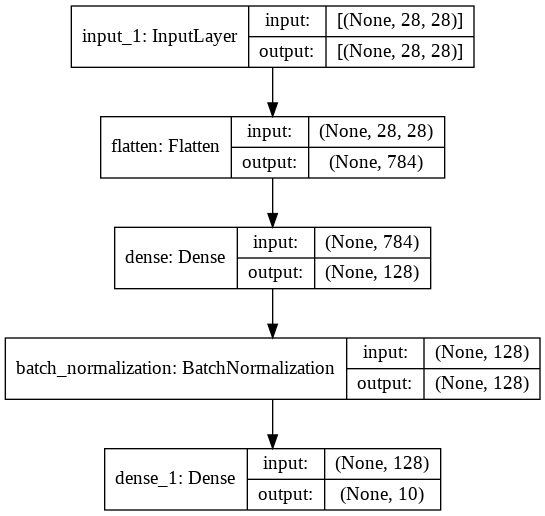

In [7]:
input = tf.keras.layers.Input(shape = (28 , 28))
x = tf.keras.layers.Flatten()(input)
x = tf.keras.layers.Dense(128 , activation=tf.nn.relu)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10 , activation=tf.nn.softmax)(x)

cb = MyCallBack(inputs=x_test , des_outputs=y_test , freq=4)

model = tf.keras.models.Model(inputs = input , outputs = x)
model.compile(optimizer = 'rmsprop' , loss = tf.keras.losses.categorical_crossentropy , metrics = ['acc'])

plot_model(model, show_shapes = True)

# Data , Mnist

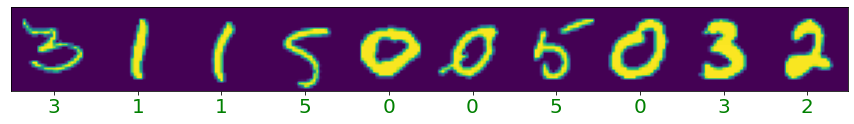

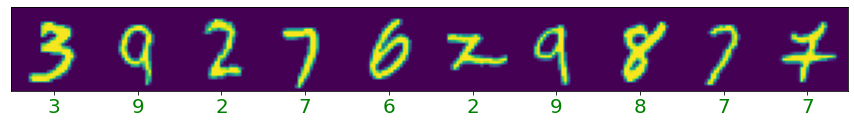

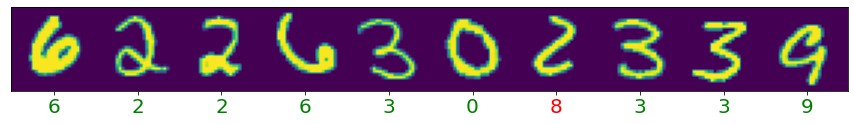

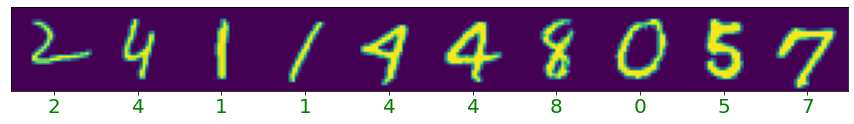

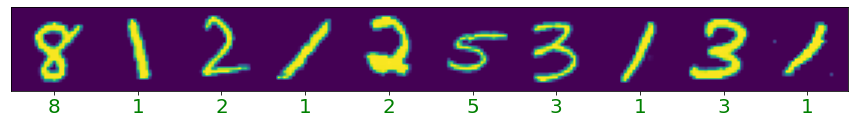

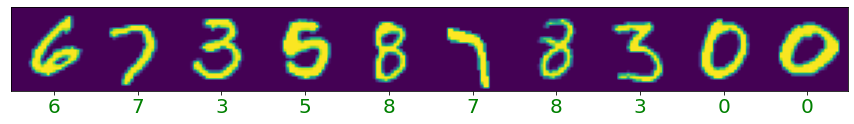

21


In [8]:
model.fit(x_train, y_train, epochs=21,
                validation_data=(x_test , y_test) , verbose=0, 
          callbacks =[cb])

